,t,L,dL
count,100.000000,100.000000,100.000000
mean,165.000000,0.018136,0.000394
std,79.122251,0.004839,0.000196
min,30.000000,0.008087,0.000046
25%,97.500000,0.014278,0.000255
50%,165.000000,0.018634,0.000390
75%,232.500000,0.022275,0.000524
max,300.000000,0.025243,0.000851


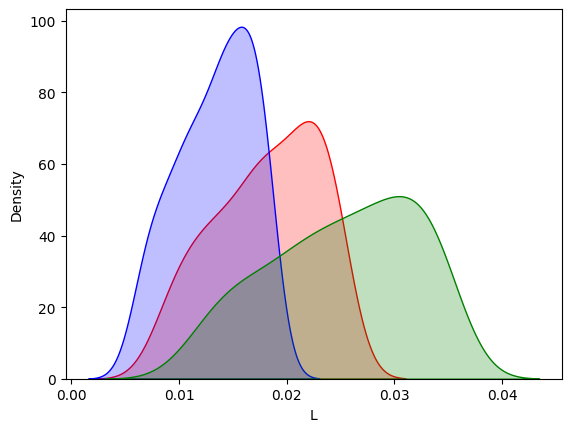

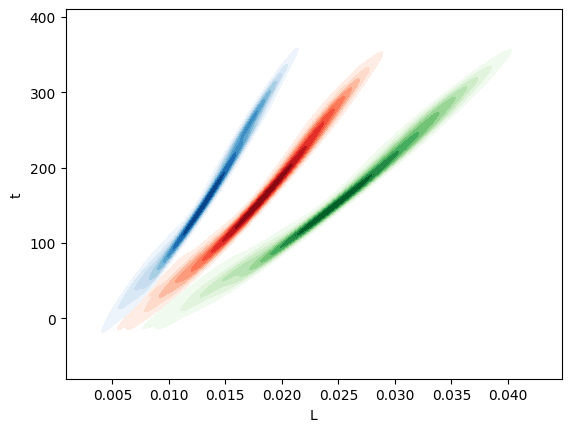

In [4]:
# Import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


dunking_data = pd.read_csv('data/dunking-data.csv')
microscopy_data = pd.read_csv('data/microscopy-data.csv')
tr1_data = pd.read_csv('data/tr-1.csv')
tr2_data = pd.read_csv('data/tr-2.csv')
tr3_data = pd.read_csv('data/tr-3.csv')

tr1_data

plt.figure()
sns.kdeplot(tr1_data['L'], fill=True, color='r')
sns.kdeplot(tr2_data['L'], fill=True, color='b')
sns.kdeplot(tr3_data['L'], fill=True, color='g')

plt.figure()
#2d kde plot
sns.kdeplot(data=tr1_data, x="L", y="t", cmap='Reds', fill=True)
sns.kdeplot(data=tr2_data, x="L", y="t", cmap='Blues', fill=True)
sns.kdeplot(data=tr3_data, x="L", y="t", cmap='Greens', fill=True)

tr1_data.describe()

In [5]:
dunking_data

,gamma,phi,eta,L,t,biscuit
0,0.073897,1.333006,0.000999,0.011196,19.362214,Digestive
1,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive
2,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive
3,0.070793,1.502001,0.001002,0.003774,16.292780,Hobnob
4,0.058917,1.548274,0.001004,0.002291,13.662271,Hobnob
...,...,...,...,...,...,...
2995,0.084596,1.557367,0.000981,0.003221,24.231107,Digestive
2996,0.067928,1.487239,0.000993,0.003933,12.256570,Hobnob
2997,0.059526,1.444489,0.000998,0.007583,26.464108,Hobnob
2998,0.071386,1.212213,0.001004,0.013988,22.772293,Digestive


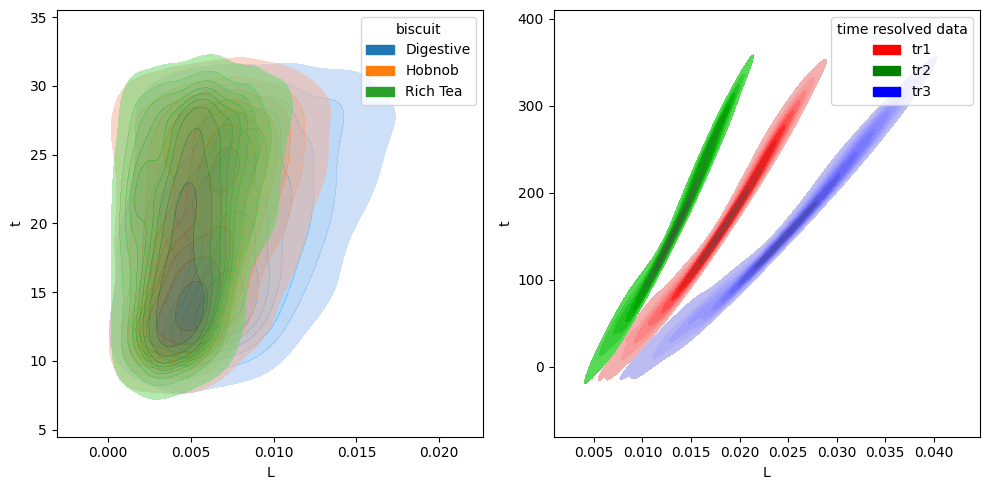

In [22]:
import matplotlib.patches as mpatches

fig,ax = plt.subplots(1,2, figsize=(10,5))

sns.kdeplot(data=dunking_data,ax=ax[0], x="L", y="t", hue="biscuit", fill=True, alpha=0.5)

sns.kdeplot(data=tr1_data, ax=ax[1],x= 'L', y="t", fill=True, color='r', label='tr1')
sns.kdeplot(data=tr2_data, ax=ax[1],x= 'L', y="t", fill=True, color='g', label='tr2')
sns.kdeplot(data=tr3_data, ax=ax[1],x= 'L', y="t", fill=True, color='b', label='tr3')

# Create a legend
red_patch = mpatches.Patch(color='red', label='tr1')
green_patch = mpatches.Patch(color='green', label='tr2')
blue_patch = mpatches.Patch(color='blue', label='tr3')

legend = ax[1].legend(title='time resolved data', 
                      handles=[red_patch, green_patch, blue_patch])

plt.tight_layout()
plt.show()

In [22]:
print(dunking_data.info())
print(dunking_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gamma    3000 non-null   float64
 1   phi      3000 non-null   float64
 2   eta      3000 non-null   float64
 3   L        3000 non-null   float64
 4   t        3000 non-null   float64
 5   biscuit  3000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 140.8+ KB
None
             gamma          phi          eta            L            t
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000
mean      0.073240     1.443311     0.001001     0.006243    19.848705
std       0.009956     0.094904     0.000010     0.003184     5.809489
min       0.040328     1.016252     0.000963     0.000185    10.013910
25%       0.066587     1.388532     0.000994     0.003957    14.675764
50%       0.073153     1.463111     0.001001     0.005789    19.859176
75%       0.079855     1.517507   

In [33]:

tr_1_cut = tr1_data[tr1_data['t'] < 30]

In [32]:
tr2_data

,t,L,dL
0,30.000000,0.005809,0.000228
1,32.727273,0.006243,0.000514
2,35.454545,0.006394,0.000393
3,38.181818,0.006601,0.000323
4,40.909091,0.006822,0.000566
...,...,...,...
95,289.090909,0.018278,0.000407
96,291.818182,0.018326,0.000248
97,294.545455,0.018127,0.000368
98,297.272727,0.018770,0.000881


In [37]:
# Constants
tea_surface_tension = 6.78e-2  # N m−1
contact_angle = 1.45  # rad
tea_dynamic_viscosity = 9.93e-4  # Pa s

tr1_data['eta'] = tea_dynamic_viscosity
tr1_data['gamma'] = tea_surface_tension
tr1_data['phi'] = contact_angle

tr2_data['eta'] = tea_dynamic_viscosity
tr2_data['gamma'] = tea_surface_tension
tr2_data['phi'] = contact_angle

tr3_data['eta'] = tea_dynamic_viscosity
tr3_data['gamma'] = tea_surface_tension
tr3_data['phi'] = contact_angle


In [39]:
tr1_data

,t,L,dL,eta,gamma,phi
0,30.000000,0.008087,0.000392,0.000993,0.0678,1.45
1,32.727273,0.008253,0.000270,0.000993,0.0678,1.45
2,35.454545,0.008607,0.000501,0.000993,0.0678,1.45
3,38.181818,0.008920,0.000267,0.000993,0.0678,1.45
4,40.909091,0.009604,0.000274,0.000993,0.0678,1.45
...,...,...,...,...,...,...
95,289.090909,0.024948,0.000307,0.000993,0.0678,1.45
96,291.818182,0.025015,0.000711,0.000993,0.0678,1.45
97,294.545455,0.024558,0.000322,0.000993,0.0678,1.45
98,297.272727,0.025243,0.000489,0.000993,0.0678,1.45
